# **Bank Customer Churn Prediction And Analysis**


#![alt text here](https://miro.medium.com/v2/resize:fit:1024/0*n7vG65S6qTv7KhZK.png)

# Project Overview

 - The Bank Customer Churn Analysis and Prediction Project
 involves analysis and building a machine learning model to analysis and predict customer churn.
 -This project utilizes data science techniques such as data collection, exploration, feature engineering, machine learning, and model deployment, with the goal of identifying customers at risk of leaving and enabling the company to take proactive retention measures.

# Importing libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from scipy.stats import zscore
import scipy.stats as stats
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1 - Milestone 1  : Data Collection, Exploration, and Preprocessing
- Objectives  :
  Data Collection, Exploration, and Preprocessing Bank Customer Churn Dataset to prepare for analysis and model building.

# 1- 🗂️ Dataset Collection

 - Acquire a churn dataset from sources like Kaggle, UCI Repository, or generate synthetic data.

 - Ensure the dataset includes key features such as customer demographics, usage patterns, subscription details, etc.

###1.1 About The Dataset

- The Bank Customer Churn dataset is a commonly used dataset for predicting customer churn in the banking industry and we get it from Kaggle.
https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction
- It contains information on bank customers who either left the bank or continue to be a customer.




###1.2 Reading the Dataset

In [48]:
# Try-except block to handle potential errors while reading the CSV file
try:
    # Attempt to read the CSV file
    df = pd.read_csv('/content/Data of Bank Customer Churn analysis and Prediction.csv')

    # Convert all column names to lowercase
    df.columns = df.columns.str.lower()
    InitialNumberOfRows=df.shape[0]
    InitialNUmberOfColumns=df.shape[1]

    # Display updated column names
    print("Updated column names:", df.columns)

    # Confirmation message upon successful data loading
    print("Dataset has loaded successfully.")

# Handle the case where the file is not found
except FileNotFoundError:
    print("Error: 'Data Bank Customer Churn Prediction.csv' not found. Please upload the file or provide the correct path.")

# Handle errors related to CSV parsing issues (e.g., incorrect formatting)
except pd.errors.ParserError:
    print("Error: Unable to parse the CSV file. Please check the file format.")

# Catch any other unexpected errors and display the error message
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Updated column names: Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')
Dataset has loaded successfully.


###1.3 MetaData For Dataset

In [49]:
# Create a dictionary with column descriptions
column_descriptions = {
    "RowNumber" : "A unique identifer for each record.",
    "Customer ID": "A unique identifier for each customer.",
    "Surname": "The customer's surname or last name.",
    "Credit Score": "A numerical value representing the customer's credit score.",
    "Geography": "The country where the customer resides (France, Spain, or Germany).",
    "Gender": "The customer's gender (Male or Female).",
    "Age": "The customer's age.",
    "Tenure": "The number of years the customer has been with the bank.",
    "Balance": "The customer's account balance.",
    "NumOfProducts": "The number of bank products the customer uses (e.g., savings account, credit card).",
    "HasCrCard": "Whether the customer has a credit card (1 = yes, 0 = no).",
    "IsActiveMember": "Whether the customer is an active member (1 = yes, 0 = no).",
    "EstimatedSalary": "The estimated salary of the customer.",
    "Exited": "Whether the customer has churned (1 = yes, 0 = no)."
}

# Convert dictionary to DataFrame
columns_info = pd.DataFrame(column_descriptions.items(), columns=["Column Name", "Description"])

# Apply styling: Left-align text and ensure column headers are fully visible
styled_table = columns_info.style.set_properties(**{'text-align': 'left'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)

# Display the styled table
display(styled_table)


,Column Name,Description
0,RowNumber,A unique identifer for each record.
1,Customer ID,A unique identifier for each customer.
2,Surname,The customer's surname or last name.
3,Credit Score,A numerical value representing the customer's credit score.
4,Geography,"The country where the customer resides (France, Spain, or Germany)."
5,Gender,The customer's gender (Male or Female).
6,Age,The customer's age.
7,Tenure,The number of years the customer has been with the bank.
8,Balance,The customer's account balance.
9,NumOfProducts,"The number of bank products the customer uses (e.g., savings account, credit card)."


# 2- 📊 Data Exploration

- Conduct exploratory data analysis (EDA) to understand the dataset’s structure.
- Check for missing values, duplicates, and outliers.
 Summarize data distributions and basic statistics.
- Identify potential relationships between features.

## 2.1 Showing The Dataset

In [ ]:
# Display the first 5 rows of the dataset
print("\n The first 5 rows of the dataset are :---->")
display(df.head())

# Display the last 5 rows of the dataset
print("\n The last 5 rows of the dataset are :---->")
display(df.tail())



 The first 5 rows of the dataset are :---->


,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0



 The last 5 rows of the dataset are :---->


,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


##2.2 Dataset shape

In [ ]:
# Display the dataset shape
print(f"📊 Dataset contains {df.shape[0]} records and {df.shape[1]} columns.")

📊 Dataset contains 10002 records and 14 columns.


## 2.3 Dataset information

In [ ]:
# Display dataset information
print("\n\n🔍 Dataset Overview:")
df.info()



🔍 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10002 non-null  int64  
 1   customerid       10002 non-null  int64  
 2   surname          10002 non-null  object 
 3   creditscore      10002 non-null  int64  
 4   geography        10001 non-null  object 
 5   gender           10002 non-null  object 
 6   age              10001 non-null  float64
 7   tenure           10002 non-null  int64  
 8   balance          10002 non-null  float64
 9   numofproducts    10002 non-null  int64  
 10  hascrcard        10001 non-null  float64
 11  isactivemember   10001 non-null  float64
 12  estimatedsalary  10002 non-null  float64
 13  exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


## 2.4 Dataset summary statistics describtion

In [ ]:
# Display dataset summary statistics
print("\n\n📊 Statistical Summary of the Dataset:")
df.describe()



📊 Statistical Summary of the Dataset:


,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


## 2.5 Check duplicated values

In [ ]:
df.duplicated().sum()

np.int64(2)

## 2.6 Check missing values

In [ ]:
df.isnull().sum()

,0
rownumber,0
customerid,0
surname,0
creditscore,0
geography,1
gender,0
age,1
tenure,0
balance,0
numofproducts,0


##2.7 Check unique values

In [ ]:
df.nunique().sort_values()

,0
gender,2
exited,2
hascrcard,2
isactivemember,2
geography,3
numofproducts,4
tenure,11
age,73
creditscore,460
surname,2932


## 2.8- Check Outliers distribution

In [ ]:
# Function to identify outliers for all numerical columns
def identify_outliers(df):
    outlier_dict = {}  # Dictionary to store outliers for each column

    numerical_cols = df.select_dtypes(include=[np.number]).columns  # Select numeric columns

    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        minw = Q1 - 1.5 * IQR  # Lower bound
        maxw = Q3 + 1.5 * IQR  # Upper bound

        # Identify outliers
        outliers = df[(df[col] < minw) | (df[col] > maxw)]
        outlier_dict[col] = outliers

    return outlier_dict  # Return dictionary containing outliers for all columns

# Call the function
outliers_dict = identify_outliers(df)

# Print the number of outliers in each column
for col, outliers in outliers_dict.items():
    print(f"📌 Outliers in '{col}': {len(outliers)} rows")


📌 Outliers in 'rownumber': 0 rows
📌 Outliers in 'customerid': 0 rows
📌 Outliers in 'creditscore': 15 rows
📌 Outliers in 'age': 359 rows
📌 Outliers in 'tenure': 0 rows
📌 Outliers in 'balance': 0 rows
📌 Outliers in 'numofproducts': 60 rows
📌 Outliers in 'hascrcard': 0 rows
📌 Outliers in 'isactivemember': 0 rows
📌 Outliers in 'estimatedsalary': 0 rows
📌 Outliers in 'exited': 2038 rows


In [ ]:
i = df[["creditscore", "age", "numofproducts"]]
for x in i.columns:
    # Showing outliers for each column
    Q1 = i[x].quantile(0.25)
    Q3 = i[x].quantile(0.75)  # Use i[x] for consistency
    IQR = Q3 - Q1
    lower_bound_iqr = Q1 - 1.5 * IQR
    upper_bound_iqr = Q3 + 1.5 * IQR
    print(f"The outliers for {x} column from {lower_bound_iqr} To below")
    print(f"The outliers for {x} column from {upper_bound_iqr} To above \n")

The outliers for creditscore column from 383.0 To below
The outliers for creditscore column from 919.0 To above 

The outliers for age column from 14.0 To below
The outliers for age column from 62.0 To above 

The outliers for numofproducts column from -0.5 To below
The outliers for numofproducts column from 3.5 To above 



### 2.8.1- Boxplot Outliers

<ipython-input-13-c8516263dcd5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[feature], width=0.4, palette="coolwarm")
<ipython-input-13-c8516263dcd5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[feature], width=0.4, palette="coolwarm")
<ipython-input-13-c8516263dcd5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[feature], width=0.4, palette="coolwarm")


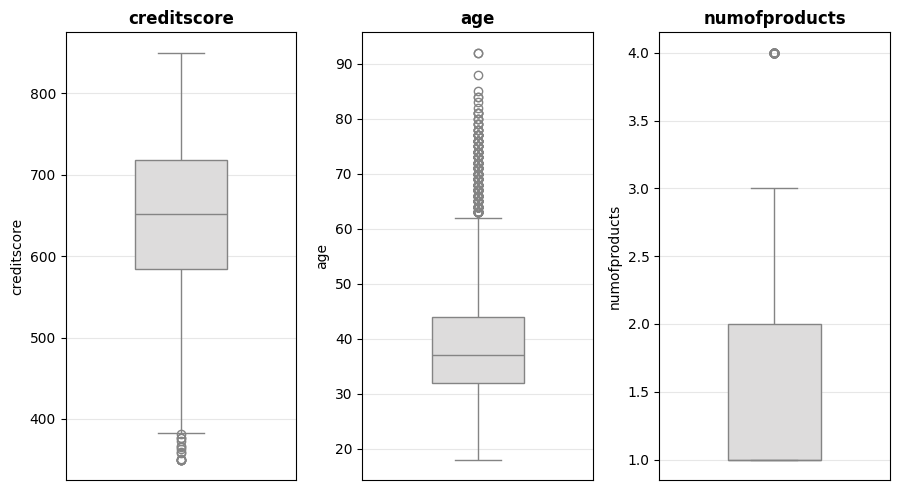

In [ ]:
# Define features to plot
features = df[['creditscore','age','numofproducts']]
num_features = len(features)

# Split into two parts
#split_index = num_features // 2  # Half of the features

# First Page (First Half of Features)
plt.figure(figsize=(18, 5))
for i, feature in enumerate(features[:3], 1):
    plt.subplot(1, 6, i)
    sns.boxplot(y=df[feature], width=0.4, palette="coolwarm")
    plt.grid(alpha=0.3)
    plt.title(feature, fontsize=12, fontweight="bold")
    plt.xticks([])

plt.tight_layout()
plt.show()

# 3- ⚙️ Dataset Preprocessing

- Address missing data through imputation or removal.
- Handle outliers and ensure data consistency.

## 3.1 Swaping DataSet

In [71]:
# Swaping to work on a copy from mean dataset to avoid change on basic dataset
data = df.copy(deep=True)
data.shape

(10002, 14)

## 3.2 Remove unncessary Columns

In [72]:
try:
    # Convert column names to lowercase for case-insensitive matching
    data.columns = data.columns.str.lower()

    # Define columns to drop (using lowercase)
    columns_to_drop = ['rownumber','customerid', 'surname']

    # Check if the columns exist before dropping
    existing_cols = [col for col in columns_to_drop if col in data.columns]

    if existing_cols:
        # Drop only existing columns
        data = data.drop(existing_cols, axis=1)
        print(f"Successfully dropped columns: {existing_cols}")
    else:
        print("Warning: No matching columns found to drop.")

except KeyError as e:
    print(f"KeyError: {e} - Some columns were not found in the dataset.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")


Successfully dropped columns: ['rownumber', 'customerid', 'surname']


##3.3 Handling dublicated values

In [73]:
# Remove duplicate rows and keep the first occurrence
data = data.drop_duplicates()
print(" Remaining duplicate count:", data.duplicated().sum(),"\n","Shape of data is ",data.shape)  # Should print 0

 Remaining duplicate count: 0 
 Shape of data is  (10000, 11)


##3.4 Handling missing values

In [74]:
# Remove rows where any of the specified columns contain null values, and we will remove them because few rows and not affect on dataset.
data = data.dropna(subset=['geography', 'age', 'hascrcard', 'isactivemember'])

# Confirm that missing values are removed
print("Remaining missing values in selected columns :\n", data[['geography','age','hascrcard','isactivemember']].isnull().sum())

Remaining missing values in selected columns :
 geography         0
age               0
hascrcard         0
isactivemember    0
dtype: int64


# 4- 📊 Exploratory Data Analysis (EDA)

- Create visualizations (heatmaps, pair plots, histograms) to detect patterns, correlations, and outliers.
- Document key patterns and relationships in the data.

## 4.1- BoxPlots Outliers

<ipython-input-55-8ffdd399aac9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[feature], width=0.4, palette="coolwarm")
<ipython-input-55-8ffdd399aac9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[feature], width=0.4, palette="coolwarm")
<ipython-input-55-8ffdd399aac9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[feature], width=0.4, palette="coolwarm")


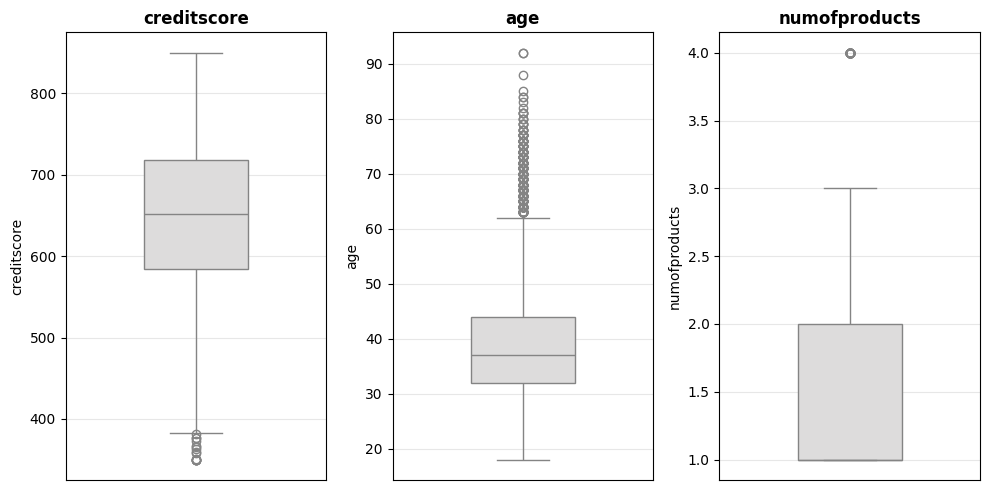

In [55]:
# Define features to plot
features = data[['creditscore','age','numofproducts']]
num_features = len(features)

# Split into two parts
#split_index = num_features // 2  # Half of the features

# First Page (First Half of Features)
plt.figure(figsize=(10, 5))
for i, feature in enumerate(features[:3], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[feature], width=0.4, palette="coolwarm")
    plt.grid(alpha=0.3)
    plt.title(feature, fontsize=12, fontweight="bold")
    plt.xticks([])

plt.tight_layout()
plt.show()

In [ ]:
# Select only numerical columns
numerical_cols = data.select_dtypes(include=np.number)

# Create an empty dictionary to store quartile ranges
quartile_ranges = {}

# Loop through each numerical column to compute quartiles
for col in numerical_cols.columns:
    Q1 = np.percentile(data[col], 25)  # 25th percentile
    Q2 = np.percentile(data[col], 50)  # Median (50th percentile)
    Q3 = np.percentile(data[col], 75)  # 75th percentile
    Q4 = np.percentile(data[col], 100) # Maximum (100th percentile)

    quartile_ranges[col] = {
        "Q1 Range": (data[col].min(), Q1),
        "Q2 Range": (Q1, Q2),
        "Q3 Range": (Q2, Q3),
        "Q4 Range": (Q3, Q4)
    }

# Convert dictionary to DataFrame for better visualization
quartile_data = pd.DataFrame(quartile_ranges).T
print(quartile_data)

                          Q1 Range                  Q2 Range  \
creditscore           (350, 584.0)            (584.0, 652.0)   
age                   (18.0, 32.0)              (32.0, 37.0)   
tenure                    (0, 3.0)                (3.0, 5.0)   
balance                 (0.0, 0.0)  (0.0, 97173.29000000001)   
numofproducts             (1, 1.0)                (1.0, 1.0)   
hascrcard               (0.0, 0.0)                (0.0, 1.0)   
isactivemember          (0.0, 0.0)                (0.0, 1.0)   
estimatedsalary  (11.58, 51002.11)     (51002.11, 100238.11)   
exited                    (0, 0.0)                (0.0, 0.0)   

                                         Q3 Range                  Q4 Range  
creditscore                       (652.0, 717.25)           (717.25, 850.0)  
age                                  (37.0, 44.0)              (44.0, 92.0)  
tenure                                (5.0, 7.25)              (7.25, 10.0)  
balance          (97173.29000000001, 127639.372

##4.2-  Histograms

### 4.2.1 histogram for categorical data

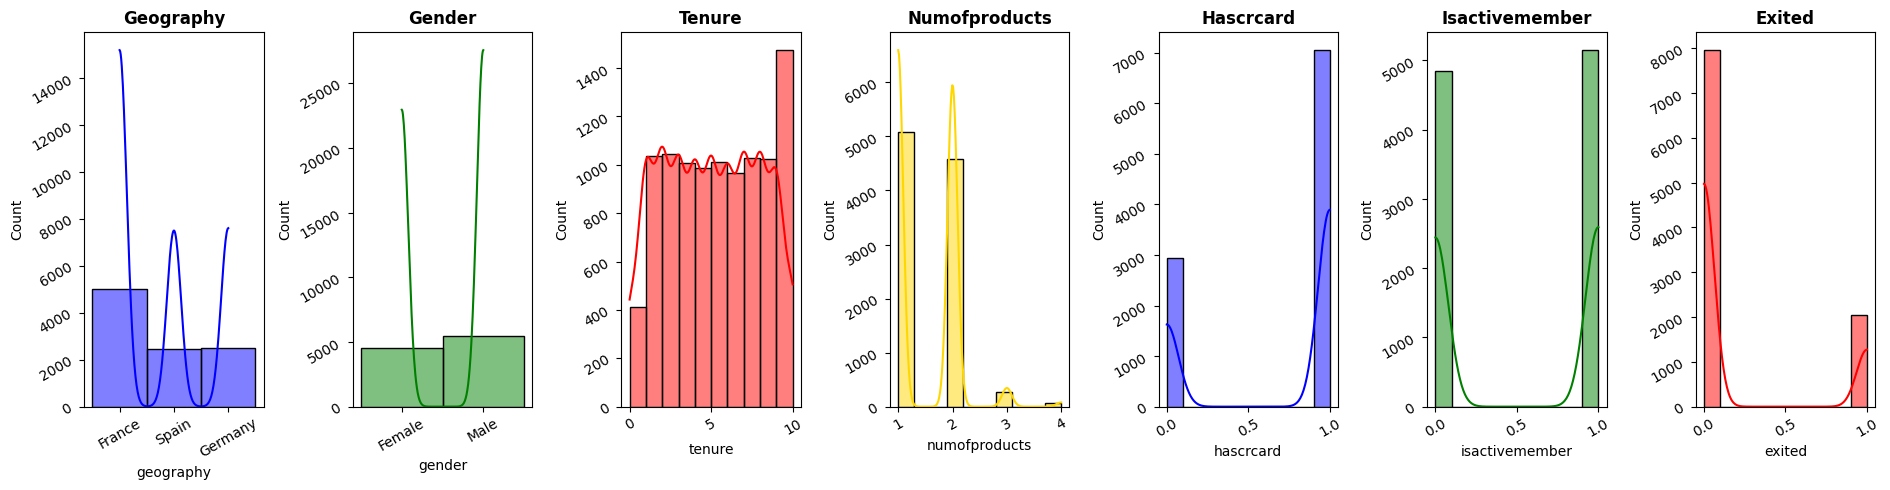

In [ ]:
# Define features and corresponding colors
features = ["geography", "gender", "tenure","numofproducts","hascrcard","isactivemember","exited"]
colors = ["blue", "green", "red", "gold","blue","green","red"]
# Convert DataFrame column names to lowercase for case-insensitive comparison
data.columns = map(str.lower, data.columns)

# Convert features list to lowercase for matching
features_lower = [feature.lower() for feature in features]

# Set up figure size
plt.figure(figsize=(19, 5))

# Loop through features and plot histograms with error handling
for i, (feature, color) in enumerate(zip(features_lower, colors), 1):
    try:
        if feature in data.columns:  # Ensure the column exists
            plt.subplot(1, 7, i)
            sns.histplot(data[feature], bins=10, kde=True, color=color)
            #plt.grid(alpha=0.5)
            plt.title(feature.capitalize(), fontsize=12, fontweight="bold")  # Format title
            plt.xticks(rotation=30)
            plt.yticks(rotation=30)
        else:
            print(f"Warning: Column '{feature}' not found in dataset.")
    except Exception as e:
        print(f"Error while plotting '{feature}': {e}")

# Adjust layout and display plot
plt.tight_layout()
plt.show()

### 4.2.2 histogram for numerical data

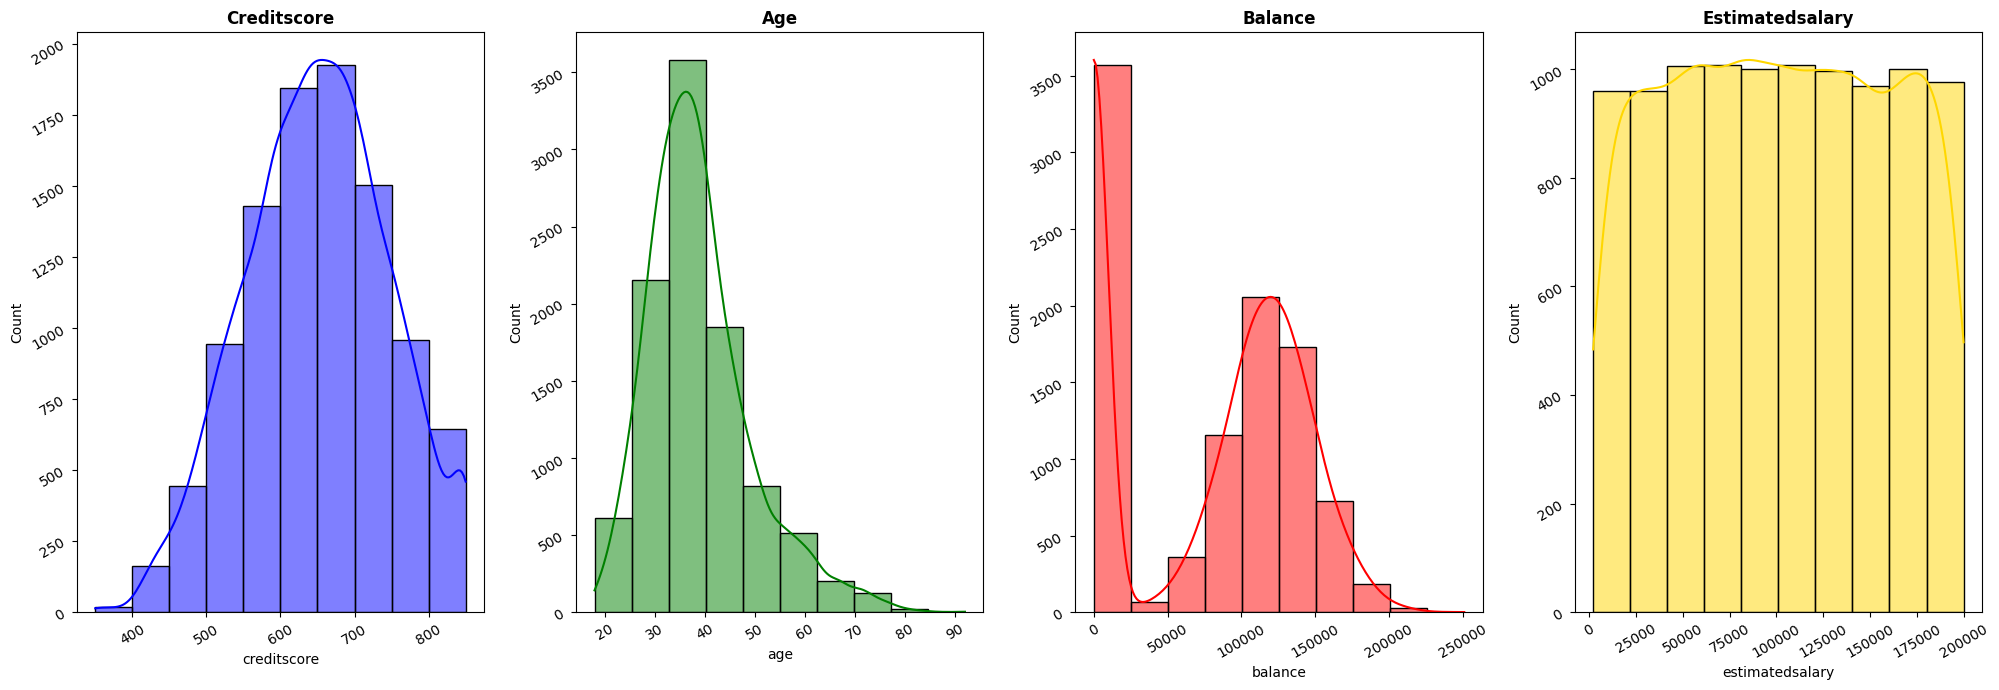

In [ ]:
# Define features and corresponding colors
features = ["creditscore", "age", "balance","estimatedsalary"]

# Convert DataFrame column names to lowercase for case-insensitive comparison
data.columns = map(str.lower, data.columns)

# Convert features list to lowercase for matching
features_lower = [feature.lower() for feature in features]

# Set up figure size
plt.figure(figsize=(35, 7))

# Loop through features and plot histograms with error handling
for i, (feature, color) in enumerate(zip(features_lower, colors), 1):
    try:
        if feature in data.columns:  # Ensure the column exists
            plt.subplot(1, 7, i)
            sns.histplot(data[feature], bins=10, kde=True, color=color)
            #plt.grid(alpha=0.8)
            plt.title(feature.capitalize(), fontsize=12, fontweight="bold")  # Format title
            plt.xticks(rotation=30)
            plt.yticks(rotation=30)
        else:
            print(f"Warning: Column '{feature}' not found in dataset.")
    except Exception as e:
        print(f"Error while plotting '{feature}': {e}")

# Adjust layout and display plot
plt.tight_layout()
plt.show()

### 4.2.3 Check count balance 0

In [56]:
# The count of clients who have balance zero
balance_category_counts = (data['balance'] == 0).sum()
print("---> The Count of Clients who have balance 0 is",balance_category_counts,"Clients.")

# The count of clients who have balance zero and left the bank
balance_category_counts_Exited = ((data["balance"] == 0) & (data["exited"] == 1)).sum()
print("\n---> The Count of Clients who have balance 0 and left the bank is",balance_category_counts_Exited,"Clients.")

# The Count of Clients who have balance 0 and never left the bank
print("\n---> The Count of Clients who have balance 0 and never left the bank is",balance_category_counts - balance_category_counts_Exited,"Clients.")


---> The Count of Clients who have balance 0 is 3616 Clients.

---> The Count of Clients who have balance 0 and left the bank is 500 Clients.

---> The Count of Clients who have balance 0 and never left the bank is 3116 Clients.


### 4.2.4 Check count estimatedsalary < 2100

In [75]:
# The count of clients who have estimatedsalary less than 2100 euro
estimatedsalary_category_counts = (data['estimatedsalary'] < 2100 ).sum()
print("---> The count of clients who have estimatedsalary less than (2100 euro) is",estimatedsalary_category_counts,"Clients.")


# The count of clients who have estimatedsalary less than 2100 euro and left the bank
estimatedsalary_category_counts_Exited = ((data["estimatedsalary"] < 2100) & (data["exited"] == 1)).sum()
print("\n---> The count of clients who have estimatedsalary less than (2100 euro) and left the bank is",estimatedsalary_category_counts_Exited,"Clients.")

# The Count of Clients who have balance 0 and never left the bank
print("\n---> The Count of Clients who have estimatedsalary less than (2100 euro) and never left the bank is",estimatedsalary_category_counts - estimatedsalary_category_counts_Exited,"Clients.")

# Delete clients who have estimatedsalary less than 2100 euro.
data = data[data["estimatedsalary"] >= 2100]
print("\n---> Shape of dataset after Deleting clients who have estimatedsalary less than 2100 euro is ",data.shape)


---> The count of clients who have estimatedsalary less than (2100 euro) is 115 Clients.

---> The count of clients who have estimatedsalary less than (2100 euro) and left the bank is 21 Clients.

---> The Count of Clients who have estimatedsalary less than (2100 euro) and never left the bank is 94 Clients.

---> Shape of dataset after Deleting clients who have estimatedsalary less than 2100 euro is  (9881, 11)


##4.3-  PairPlots

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

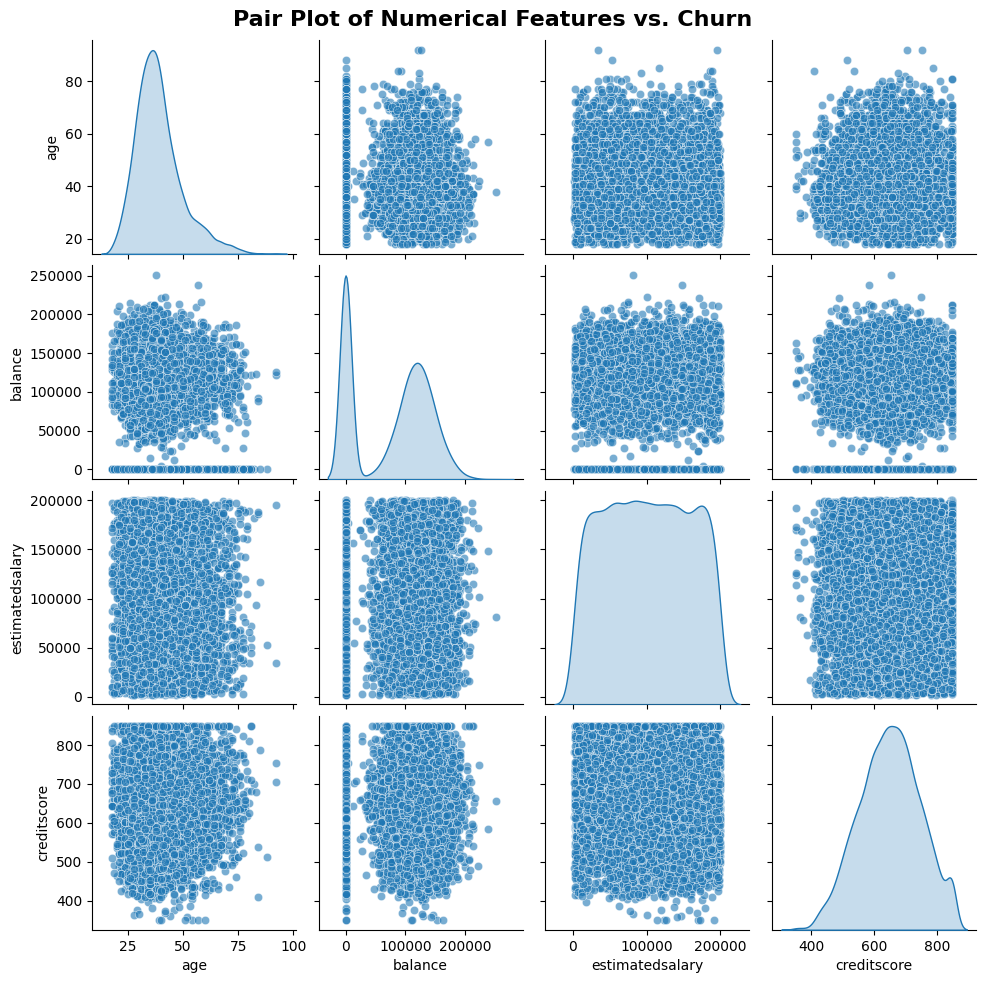

In [ ]:
# Select numerical features
numerical_features = ["age", "balance", "estimatedSalary","creditscore"]

#Convert column names to lowercase for case-insensitive comparison
data.columns = map(str.lower, data.columns)
numerical_features_lower = [feature.lower() for feature in numerical_features]


# Ensure all features exist before plotting
missing_features = [feature for feature in numerical_features_lower if feature not in data.columns]
if missing_features:
    print(f"Warning: The following columns are missing from the dataset: {missing_features}")
else:
    try:
        # Create a pair plot with hue for churn and better styling
        pairplot = sns.pairplot(
            data, vars=numerical_features_lower,
            diag_kind="kde", palette="coolwarm", plot_kws={'alpha': 0.6}
        )

        # Improve title placement
        plt.subplots_adjust(top=0.95)
        plt.suptitle("Pair Plot of Numerical Features vs. Churn", fontsize=16, fontweight="bold")

        # Show plot
        plt.show()
    except Exception as e:
        print(f"Error while generating pair plot: {e}")


##4.4- HeatMap Correlation

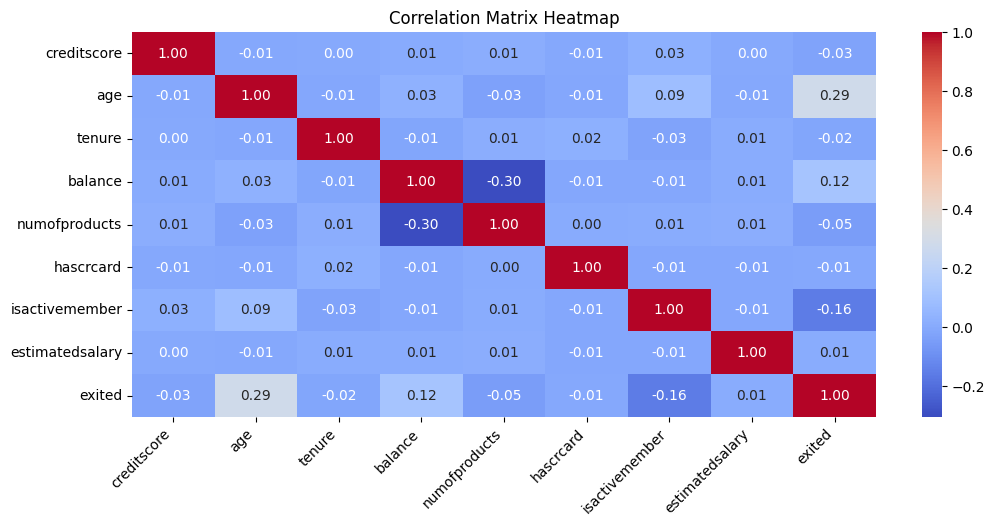

In [33]:
# Show colleration
plt.figure(figsize=(12, 5))
corr_matrix = data.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.xticks(rotation=45, ha='right')
plt.title("Correlation Matrix Heatmap")
plt.show()

## 4.5 Dataset shape after cleaning

In [34]:
# Display the dataset shape
print(f"📊 Dataset contains {data.shape[0]} records and {data.shape[1]} columns.")

📊 Dataset contains 9881 records and 11 columns.


## 4.6 Save Cleaned DataSet

In [ ]:
# Save cleaned dataset
cleaned_data = "cleaned_dataset.csv"
data.to_csv(cleaned_data, index=False)

# Download cleaned dataset
files.download(cleaned_data)

print(f"Cleaned dataset saved as {cleaned_data} and downloaded.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cleaned dataset saved as cleaned_dataset.csv and downloaded.


# 2 - Milestone 2 : Advanced Data Analysis and Feature Engineering
- Perform deeper data analysis and enhance feature selection and engineering to improve the model's predictive power.

#1-  Feature Engineering


## 1.1 Features creation

### 1.1.1 Creditscore range

Common Credit Score Ranges
1. Poor: 300–579      # we will encode it with 0
2. Fair: 580–669      # we will encode it with 1
3. Good: 670–739      # we will encode it with 2
4. Very Good: 740–799 # we will encode it with 3
5. Excellent: 800–850 # we will encode it with 4


In [76]:
for index in data.index:
    credit_score = data.loc[index, 'creditscore']
    if 300 <= credit_score < 580:
        data.loc[index, 'creditscorerange'] = 0
    elif 580 <= credit_score < 670:
        data.loc[index, 'creditscorerange'] = 1
    elif 670 <= credit_score < 740:
        data.loc[index, 'creditscorerange'] = 2
    elif 740 <= credit_score < 800:
        data.loc[index, 'creditscorerange'] = 3
    elif 800 <= credit_score <= 850:
        data.loc[index, 'creditscorerange'] = 4
data["creditscorerange"] = data["creditscorerange"].astype(int)

### 1.1.2 Age rate

Common Age Ranges
1. younger: 18_30      # we will encode it with 0
2. Middle: 31_45      # we will encode it with 1
3. Older: 46 to above     # we will encode it with 2

In [77]:
for index in data.index:
    Age_Range= data.loc[index, 'age']
    if 18 <= Age_Range < 35:
        data.loc[index, 'agerange'] = 0  # Younger Age
    elif 35 <= Age_Range < 50:
        data.loc[index, 'agerange'] = 1  # Middle Age
    else :
        data.loc[index, 'agerange'] = 2  # Old Age

data["agerange"] = data["agerange"].astype(int)

### 1.1.3 Balance range

In [78]:
for index in data.index:
    Balance_Range= data.loc[index, 'balance']
    if 0 < Balance_Range < 40000:
        data.loc[index, 'balancerange'] = 0 # Low balance
    elif 40000 <= Balance_Range < 120000:
        data.loc[index, 'balancerange'] = 1 # Middle balance
    else :
        data.loc[index, 'balancerange'] = 2 # High balance

data["balancerange"] = data["balancerange"].astype(int)

### 1.1.4 EstimatedSalary range

In [79]:
for index in data.index:
    Estimatedsalary_Range= data.loc[index, 'estimatedsalary']
    if 2100 < Estimatedsalary_Range < 40000:
        data.loc[index, 'estimatedsalaryrange'] = 0 # Low estimatedsalary
    elif 40000 <= Estimatedsalary_Range < 70000:
        data.loc[index, 'estimatedsalaryrange'] = 1 # Middle estimatedsalary
    else :
        data.loc[index, 'estimatedsalaryrange'] = 2 # High estimatedsalary

data["estimatedsalaryrange"] = data["estimatedsalaryrange"].astype(int)

### 1.1.5 Tenure range

In [80]:
for index in data.index:
    Tenure_Range = data.loc[index, 'tenure']
    if 0 <= Tenure_Range <= 1 :
        data.loc[index, 'tenurerange'] = 0 # new client
    elif 1 < Tenure_Range <= 3 :
        data.loc[index, 'tenurerange'] = 1 # Short client
    elif 3 < Tenure_Range <= 6 :
        data.loc[index, 'tenurerange'] = 2 # mid client
    else :
        data.loc[index, 'tenurerange'] = 3 # long client

data["tenurerange"] = data["tenurerange"].astype(int)

## 1.2 Features transformation

### 1.2.1 Casting

In [81]:
# convert attributes from float values to int values
data[['age','hascrcard','isactivemember']]=data[['age','hascrcard','isactivemember']].astype(int)
# show confirm attributes from float values to int values
data[['age','hascrcard','isactivemember']].dtypes

,0
age,int64
hascrcard,int64
isactivemember,int64


### 1.2.2 Encoding

In [82]:
# show unique value of gender
print(data['gender'].unique())
#encoding gender to 0 means male and 1 means female
data = data.replace(['Male','Female'],(0,1))

['Female' 'Male']


<ipython-input-82-23031e05c8c8>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(['Male','Female'],(0,1))


In [88]:
# show unique value of geography
print(data['geography'].unique(),"\n")
# encoding gender to 0 means France and 1 means Spain and 2 means Germany
data = pd.get_dummies(data, columns=['geography'], drop_first=False)  # Set drop_first=True to avoid multicollinearity
display("\n",data.head(2))

KeyError: 'geography'

### 1.2.3 Scaling

In [84]:
scale = StandardScaler()
data[["creditscore",'age','balance',"estimatedsalary"]] = scale.fit_transform(data[["creditscore",'age','balance',"estimatedsalary"]])
print("dataset shape = \n ",data.shape,"\n")
display("dataset head = ",data.head())


dataset shape = 
  (9881, 18) 



'dataset head = '

,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,creditscorerange,agerange,balancerange,estimatedsalaryrange,tenurerange,geography_France,geography_Germany,geography_Spain
0,-0.325120,1,0.294166,2,-1.227739,1,1,1,0.001572,1,1,1,2,2,1,True,False,False
1,-0.438951,1,0.198838,1,0.115544,1,0,1,0.198517,0,1,1,1,2,0,False,False,True
2,-1.535862,1,0.294166,8,1.331325,3,1,0,0.222955,1,0,1,2,2,3,True,False,False
3,0.502737,1,0.008181,1,-1.227739,2,0,0,-0.130777,0,2,1,2,2,0,True,False,False
5,-0.056066,0,0.484822,8,0.595554,2,1,0,0.853271,1,1,1,1,2,3,False,False,True


## 1.3  Features Selection

### 1.3.1 T-test
Used for numerical values and target column is two categories 0 or 1
where if P-Values < 0.05 the column is important and affect on the target column and if -2< T-Statistic >2 negative or positive the relation between column is very strong.

In [ ]:
data.columns = data.columns.str.lower()
columns_to_analyze = ["creditscore","age","balance","estimatedsalary"]

# Loop through the specified columns to perform chi-square test
for column in columns_to_analyze:
    # Indent the code block within the for loop
    exited = data[data["exited"] == 1][column]
    not_exited = data[df["exited"] == 0][column]

    t_stat, p_value = stats.ttest_ind(exited, not_exited)

    print(f"T-Statistic for {column}: {t_stat:.4f}")
    print(f"P-Value for {column}: {p_value:.5f}\n")
print("\n")

T-Statistic for creditscore: -2.6006
P-Value for creditscore: 0.00932

T-Statistic for age: 29.6049
P-Value for age: 0.00000

T-Statistic for balance: 11.7734
P-Value for balance: 0.00000

T-Statistic for estimatedsalary: 1.1101
P-Value for estimatedsalary: 0.26697





<ipython-input-37-088f91410c68>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  not_exited = data[df["exited"] == 0][column]
<ipython-input-37-088f91410c68>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  not_exited = data[df["exited"] == 0][column]
<ipython-input-37-088f91410c68>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  not_exited = data[df["exited"] == 0][column]
<ipython-input-37-088f91410c68>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  not_exited = data[df["exited"] == 0][column]


### 1.3.2 Chi_Square
Used for categorical values with the target column

In [ ]:
columns_to_analyze = data.drop(columns=["creditscore","age","balance","estimatedsalary"]).columns
for column in columns_to_analyze:
    # Check if the column is present in the DataFrame (case-insensitive)
    if column.lower() in data.columns:  # Convert to lowercase for comparison
        # Create contingency table using the current column and the 'exited' column
        contingency_table = pd.crosstab(data[column.lower()], data["exited"])

        # Perform chi-square test using the contingency table
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

        # Print the results for the current column
        #print(f"Chi-Square Test Results for {column}:")
        print(f"Chi-Square Statistic for {column} column : {chi2_stat:.3f}")
        print(f"P-Value for {column} colmun : {p_value:.5f}\n")
    else:
        # Print a warning message if the column is not found
        print(f"Warning: Column '{column}' not found in the dataset. Please check the column name.")

Chi-Square Statistic for gender column : 112.791
P-Value for gender colmun : 0.00000

Chi-Square Statistic for tenure column : 13.606
P-Value for tenure colmun : 0.19173

Chi-Square Statistic for numofproducts column : 1490.626
P-Value for numofproducts colmun : 0.00000

Chi-Square Statistic for hascrcard column : 0.335
P-Value for hascrcard colmun : 0.56254

Chi-Square Statistic for isactivemember column : 241.322
P-Value for isactivemember colmun : 0.00000

Chi-Square Statistic for exited column : 9874.843
P-Value for exited colmun : 0.00000

Chi-Square Statistic for creditscorerange column : 9.358
P-Value for creditscorerange colmun : 0.05275

Chi-Square Statistic for agerange column : 898.047
P-Value for agerange colmun : 0.00000

Chi-Square Statistic for balancerange column : 43.595
P-Value for balancerange colmun : 0.00000

Chi-Square Statistic for estimatedsalaryrange column : 0.105
P-Value for estimatedsalaryrange colmun : 0.94899

Chi-Square Statistic for tenurerange column : 

### 1.3.3 HeatMap Correlation

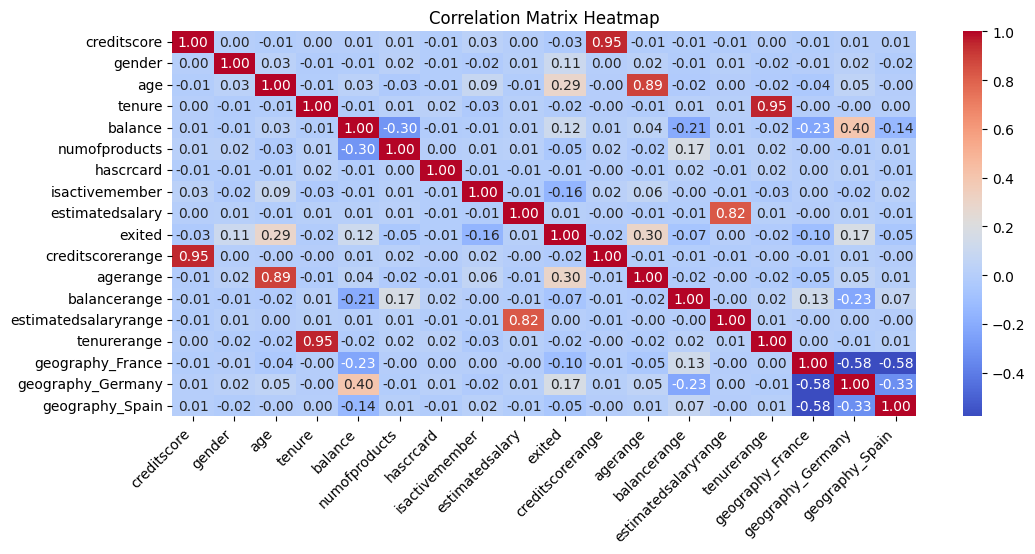

In [85]:
# Show colleration
plt.figure(figsize=(12, 5))
corr_matrix =  data.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f") # Pass the correlation matrix to heatmap
plt.xticks(rotation=45, ha='right')
plt.title("Correlation Matrix Heatmap")
plt.show()

### 1.3.4 X Features

In [ ]:
# Select Features for modeling
x=pd.DataFrame(data.drop(columns=["exited"]))
print("Features shape = \n ",x.shape,"\n")
display("Features head = ",x.head())


Features shape = 
  (9881, 17) 



'Features head = '

,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,creditscorerange,agerange,balancerange,estimatedsalaryrange,tenurerange,geography_france,geography_germany,geography_spain
0,-0.325120,1,0.294166,2,-1.227739,1,1,1,0.001572,1,1,2,2,1,True,False,False
1,-0.438951,1,0.198838,1,0.115544,1,0,1,0.198517,1,1,1,2,0,False,False,True
2,-1.535862,1,0.294166,8,1.331325,3,1,0,0.222955,0,1,2,2,3,True,False,False
3,0.502737,1,0.008181,1,-1.227739,2,0,0,-0.130777,2,1,2,2,0,True,False,False
5,-0.056066,0,0.484822,8,0.595554,2,1,0,0.853271,1,1,1,2,3,False,False,True


### 1.3.5 Y Label

In [ ]:
# Select target column for modeling
y= pd.DataFrame(data["exited"])
print("Label shape = \n ",y.shape,"\n")

display("Label head = ",y.head())

Label shape = 
  (9881, 1) 



'Label head = '

,exited
0,1
1,0
2,1
3,0
5,1


### 1.3.6 Smote   X, Y

In [ ]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)
print(" X Shape after smote is ",x.shape,"\n","Y Shape after smote is ",y.shape)

 X Shape after smote is  (15730, 17) 
 Y Shape after smote is  (15730, 1)


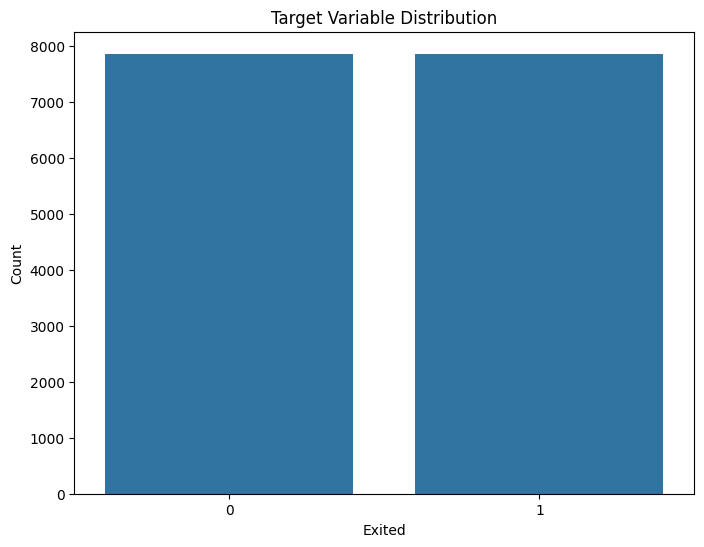

In [ ]:
# visualize target using bar
plt.figure(figsize=(8, 6))
sns.countplot(x='exited', data = y)
plt.title('Target Variable Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

# 3- Data Visualization

## 3.1  Pie Charts

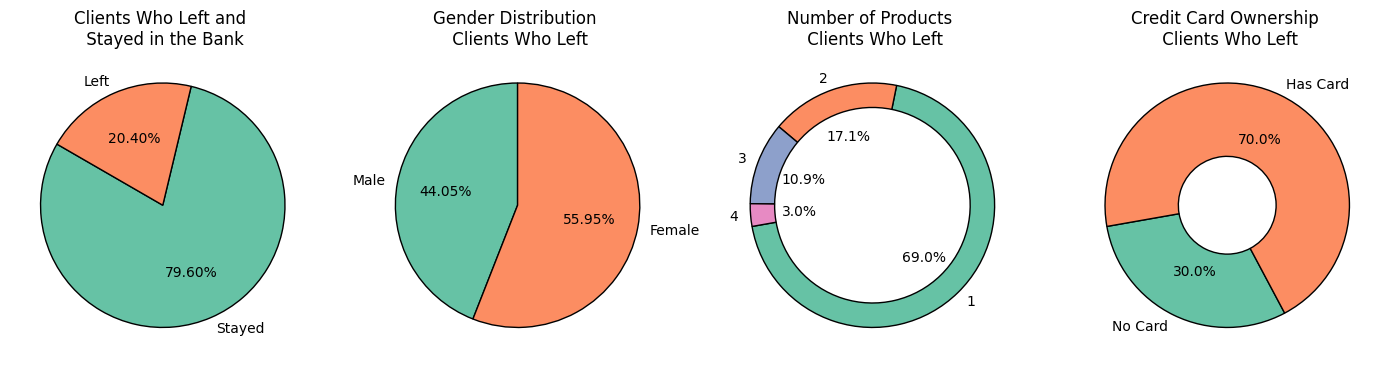

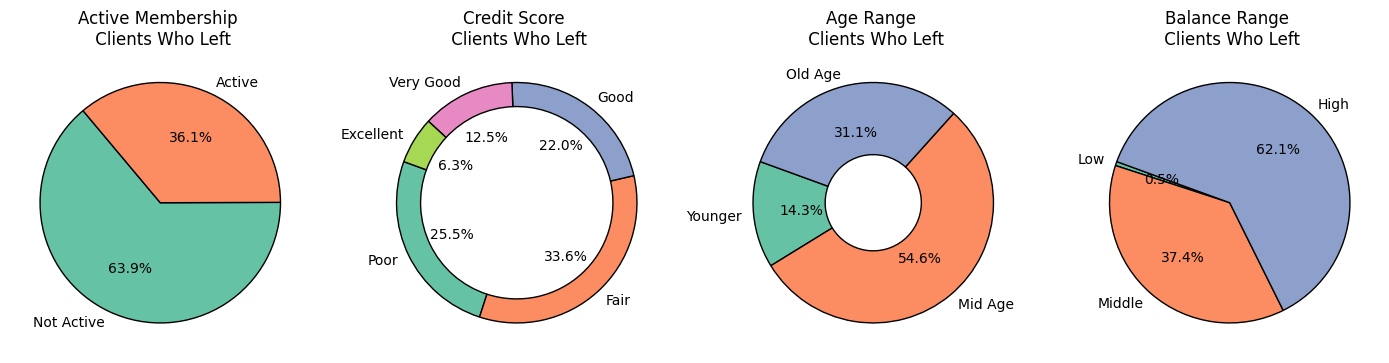

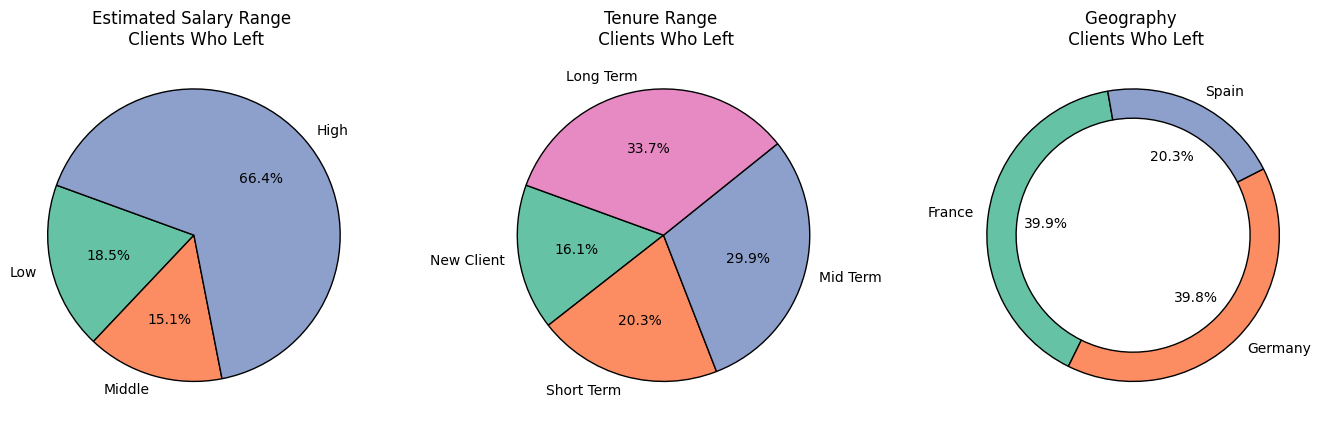

In [148]:
# Colors used
color = sns.color_palette("Set2", 10)

plt.figure(figsize=(14, 4))
count1 = data['exited'].value_counts().sort_index()
plt.subplot(1,4,1)
label = ['Stayed', 'Left']
plt.pie(count1, labels=label, autopct='%1.2f%%', colors=color, startangle=150, wedgeprops={'edgecolor': 'black'})
plt.title('Clients Who Left and \n Stayed in the Bank', fontsize=12)

# Plot 2
count2 = data[data['exited'] == 1]['gender'].value_counts().sort_index()
plt.subplot(1,4,2)
labels = ['Male', 'Female']
plt.pie(count2, labels=labels, autopct='%1.2f%%', colors=color, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Gender Distribution \n Clients Who Left', fontsize=12)

# Plot 3
count3 = data[data['exited'] == 1]['numofproducts'].value_counts().sort_index()
labels = [1, 2, 3, 4]
plt.subplot(1,4,3)
plt.pie(count3, labels=labels, autopct='%1.1f%%', colors=color, startangle=190, wedgeprops={'width': 0.2, 'edgecolor': 'black'})
plt.title('Number of Products \n Clients Who Left', fontsize=12)

# Plot 4
count4 = data[data['exited'] == 1]['hascrcard'].value_counts().sort_index()
plt.subplot(1,4,4)
labels = ['No Card', 'Has Card']
plt.pie(count4, labels=labels, autopct='%1.1f%%', colors=color, startangle=190, wedgeprops={'width': 0.6, 'edgecolor': 'black'})
plt.title('Credit Card Ownership \n Clients Who Left', fontsize=12)

plt.tight_layout()
plt.show()

# Plot 5
plt.figure(figsize=(14, 8))
count5 = data[data['exited'] == 1]['isactivemember'].value_counts().sort_index()
plt.subplot(2,4,1)
labels = ['Not Active', 'Active']
plt.pie(count5, labels=labels, autopct='%1.1f%%', colors=color, startangle=130, wedgeprops={'edgecolor': 'black'})
plt.title('Active Membership \n Clients Who Left', fontsize=12)

# Plot 6
count6 = data[data['exited'] == 1]['creditscorerange'].value_counts().sort_index()
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
plt.subplot(2,4,2)
plt.pie(count6, labels=labels, autopct='%1.1f%%', colors=color, startangle=160, wedgeprops={'width': 0.2, 'edgecolor': 'black'})
plt.title('Credit Score \n Clients Who Left', fontsize=12)

# Plot 7
count7 = data[data['exited'] == 1]['agerange'].value_counts().sort_index()
labels = ['Younger', 'Mid Age', 'Old Age']
plt.subplot(2,4,3)
plt.pie(count7, labels=labels, autopct='%1.1f%%', colors=color, startangle=160, wedgeprops={'width': 0.6, 'edgecolor': 'black'})
plt.title('Age Range \n Clients Who Left', fontsize=12)

# Plot 8
count8 = data[data['exited'] == 1]['balancerange'].value_counts().sort_index()
labels = ['Low', 'Middle', 'High']
plt.subplot(2,4,4)
plt.pie(count8, labels=labels, autopct='%1.1f%%', colors=color, startangle=160, wedgeprops={'edgecolor': 'black'})
plt.title('Balance Range \n Clients Who Left', fontsize=12)

plt.tight_layout()
plt.show()

# Plot 9
plt.figure(figsize=(14, 12))
count9 = data[data['exited'] == 1]['estimatedsalaryrange'].value_counts().sort_index()
labels = ['Low', 'Middle', 'High']
plt.subplot(3,3,1)
plt.pie(count9, labels=labels, autopct='%1.1f%%', colors=color, startangle=160, wedgeprops={'edgecolor': 'black'})
plt.title('Estimated Salary Range \n Clients Who Left', fontsize=12)

# Plot 10
count10 = data[data['exited'] == 1]['tenurerange'].value_counts().sort_index()
labels = ['New Client', 'Short Term', 'Mid Term', 'Long Term']
plt.subplot(3,3,2)
plt.pie(count10, labels=labels, autopct='%1.1f%%', colors=color, startangle=160, wedgeprops={'edgecolor': 'black'})
plt.title('Tenure Range \n Clients Who Left', fontsize=12)

# Plot 11
count11 = data[data['exited'] == 1][['geography_France', 'geography_Germany', 'geography_Spain']].sum()
labels = ['France', 'Germany', 'Spain']
plt.subplot(3,3,3)
plt.pie(count11, labels=labels, autopct='%1.1f%%', colors=color, startangle=100, wedgeprops={'width': 0.2, 'edgecolor': 'black'})
plt.title('Geography \n Clients Who Left', fontsize=12)

plt.tight_layout()
plt.show()



#display("Exited ------> ",count1 ,"Gender ------>",  count2, "Numberofproducts", count3 )
#display("Hascrcard ------> ",count4 ,"Isactivemember ------>",  count5, "Creditscorerange", count6 )
#display("Agerange ------> ",count7 ,"Balancerange ------>",  count8, "Estimatedsalaryrange", count9 )
#display("Tenurerange ------> ",count10 ,"Geography ------>",  count11)


## 3.2 Par  & Scatter Charts

Distribution of Age by Gender and Exit Status

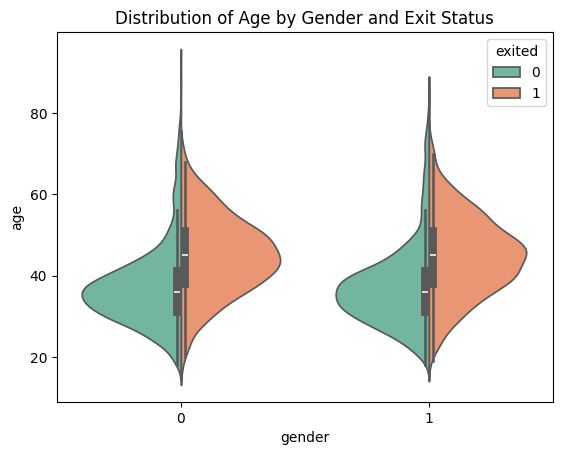

In [ ]:
sns.violinplot(data=data, x='gender', y='age', hue='exited', split=True, palette='Set2')
plt.title('Distribution of Age by Gender and Exit Status')
plt.xlabel('gender')
plt.ylabel('age')
plt.show()

Key Insights:

Age Distribution by Gender and Exit Status:

The violin plot shows the distribution of ages for both genders, separated by their exit status (churned or not churned).
The width of the plot indicates the density of data points at different age values.

Gender Comparison:

Both male and female customers who exited the bank tend to be older on average compared to those who did not exit.
The age distribution for churned customers is more spread out, indicating a wider range of ages among those who left the bank.

Average age of each group by gender

<ipython-input-50-f76a24081cc7>:1: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(data=data,x=data.exited,y=data.age,hue="gender",palette=sns.color_palette(palette='Set2'))


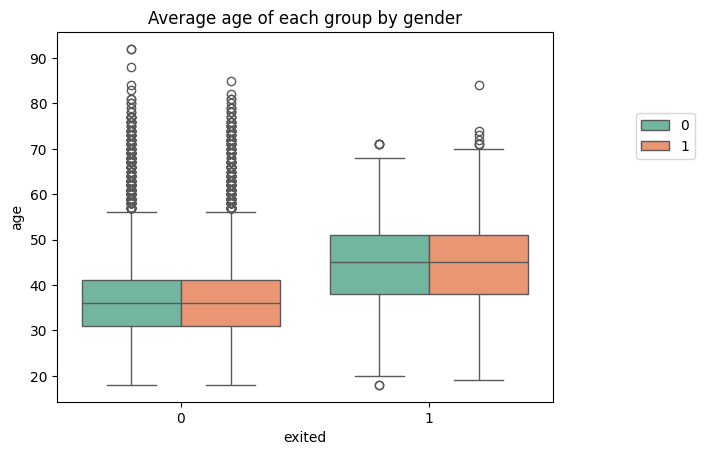

In [ ]:
sns.boxplot(data=data,x=data.exited,y=data.age,hue="gender",palette=sns.color_palette(palette='Set2'))
plt.legend(bbox_to_anchor=(1.3,0.8))
plt.title('Average age of each group by gender')
plt.show()

Key Insights:

Age Distribution:

Customers who exited the bank tend to be older on average compared to those who did not exit.
The average age of customers who exited is around 44.8 years for females and 44.9 years for males.
The average age of customers who did not exit is around 37.4 years for both females and males.

Gender Comparison:

There is a slight difference in the average age between males and females within each exit status group, but it is not significant.
Both genders show a similar trend in age distribution concerning their exit status.


Average balance of each group by gender

<ipython-input-51-c3fed5809bc8>:1: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(data=data,x=data.exited,y=data.balance,hue="gender",palette=sns.color_palette(palette='Set2'))


Text(0.5, 1.0, 'Average balance of each group by gender')

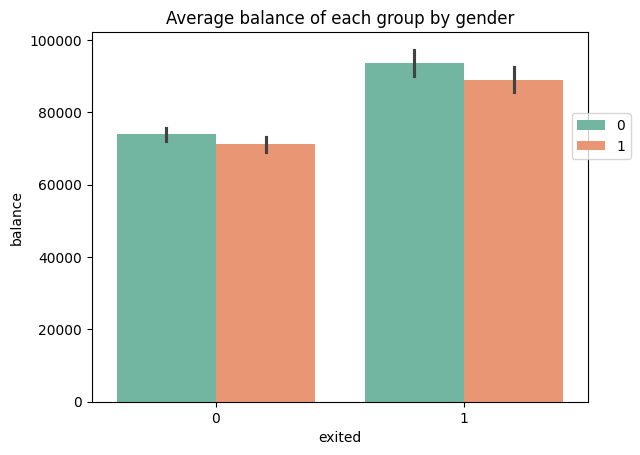

In [ ]:
sns.barplot(data=data,x=data.exited,y=data.balance,hue="gender",palette=sns.color_palette(palette='Set2'))
plt.legend(bbox_to_anchor=(1.1,0.8))
plt.title('Average balance of each group by gender')

Key Insights:

Balance Distribution:

Customers who exited the bank tend to have a higher average balance compared to those who did not exit.
The average balance of customers who exited is around 89,036.64$ for females and 93,715.73$ for males.
The average balance of customers who did not exit is around
71,200.57$ for females and 73,911.61$ for males.

Gender Comparison:

There is a noticeable difference in the average balance between males and females within each exit status group.
Males have a slightly higher average balance than females in both exited and not exited groups.


Relation between Age,Balance and people who churned

<ipython-input-52-4e3ebae24cb0>:1: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(data=data,x=data.age,y=data.balance,hue="exited",palette = sns.color_palette(palette='Dark2'))


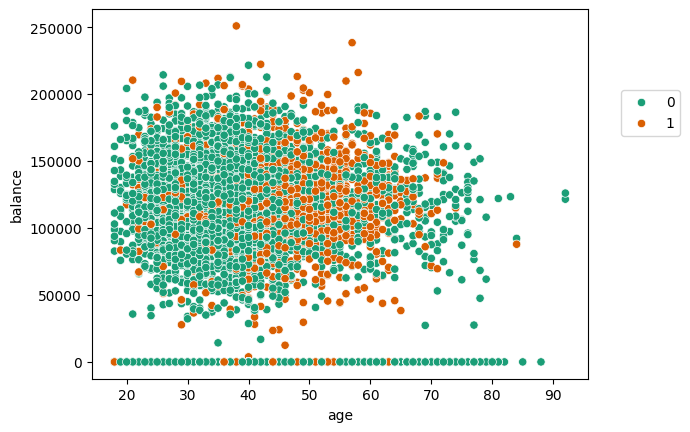

In [ ]:
sns.scatterplot(data=data,x=data.age,y=data.balance,hue="exited",palette = sns.color_palette(palette='Dark2'))
plt.legend(bbox_to_anchor=(1.2,0.8))

Key Insights:

Correlation between Age and Balance:

The correlation coefficient between Age and Balance is 0.028. This indicates a very weak positive correlation, suggesting that there is no strong linear relationship between a customer's age and their account balance.

Age and Balance Distribution:

The scatterplot shows the distribution of customers' ages and balances, with different colors representing whether they have exited (churned) or not.
Customers who have exited (churned) are spread across various age groups and balance ranges, indicating that churn is not strongly dependent on age or balance alone.

Churn Patterns:

There is a noticeable concentration of churned customers in the higher balance range, suggesting that customers with higher balances are more likely to churn.
Both younger and older customers are represented among those who have churned, indicating that age alone is not a significant predictor of churn.

Total number of people of the two groups across locations

<ipython-input-53-716ed620c099>:3: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=data_melted[data_melted['Value'] == 1], x='geography', hue='exited', palette=sns.color_palette('Paired'))


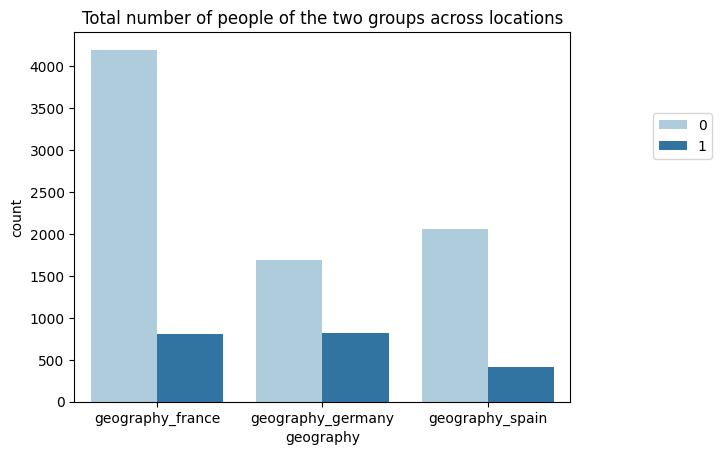

In [ ]:
data_melted = data.melt(id_vars=['exited'], value_vars=['geography_france', 'geography_germany', 'geography_spain'],
                        var_name='geography', value_name='Value')
sns.countplot(data=data_melted[data_melted['Value'] == 1], x='geography', hue='exited', palette=sns.color_palette('Paired'))
plt.legend(bbox_to_anchor=(1.3, 0.8))
plt.title('Total number of people of the two groups across locations')
plt.show()

Key Insights:

Total Number of People Across Locations:

The count plot will show the distribution of customers across different geographical locations (France, Germany, Spain) and their exit status (churned or not churned).

Geographical Distribution:

This visualization helps identify which geographical locations have higher churn rates and which have more loyal customers.

Churn Patterns:

By comparing the number of churned and non-churned customers across different locations, you can gain insights into regional differences in customer behavior.

Relation between being an active member and churning

<ipython-input-54-c21f7506b994>:1: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=data,x=data.isactivemember,hue="exited",palette=sns.color_palette(palette='Paired'))


Text(0.5, 1.0, 'Relation between being an active member and churning')

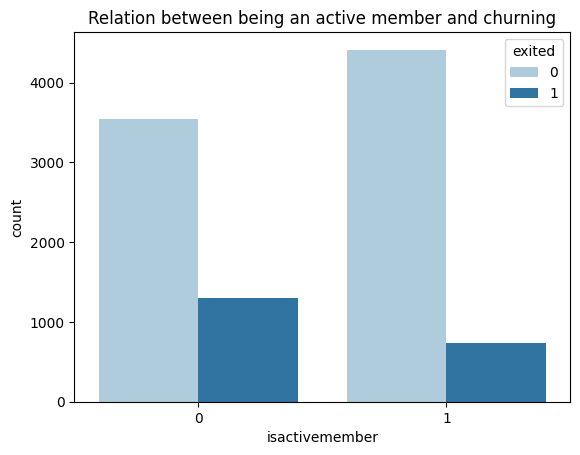

In [ ]:
sns.countplot(data=data,x=data.isactivemember,hue="exited",palette=sns.color_palette(palette='Paired'))
plt.title('Relation between being an active member and churning')

Key Insights:

Churn Rate Comparison:

Inactive members have a higher churn rate compared to active members.
Among inactive members, approximately 26.9% have churned, while among active members, only about 14.3% have churned.

Active Membership Impact:

Being an active member significantly reduces the likelihood of churning.
Active members are more likely to stay with the bank, indicating that engagement and activity are crucial factors in customer retention.

Distribution of Balance by Geography and Exit Status

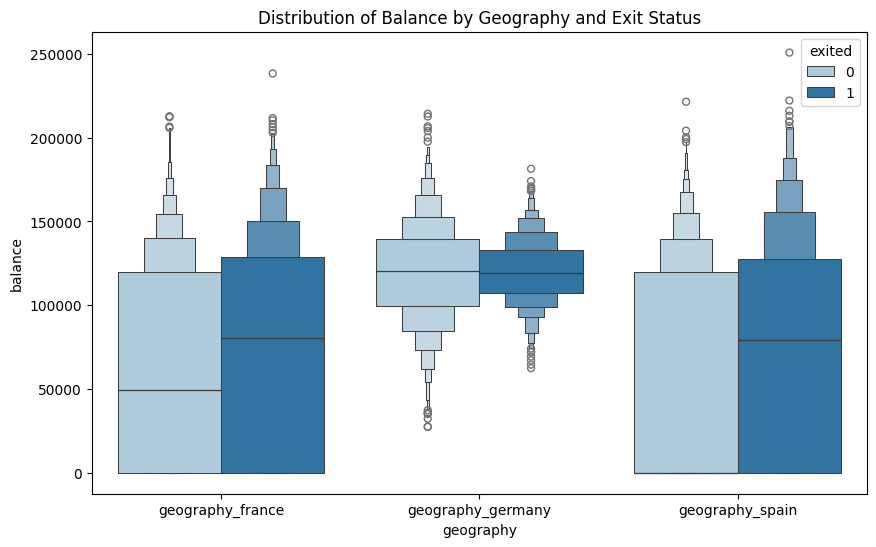

In [ ]:
data_melted = data.melt(id_vars=['exited', 'balance'], value_vars=['geography_france', 'geography_germany', 'geography_spain'],
                      var_name='geography', value_name='Value')
filtered_data = data_melted[data_melted['Value'] == 1]
plt.figure(figsize=(10, 6))
sns.boxenplot(data=filtered_data, x='geography', y='balance', hue='exited', palette='Paired')
plt.title('Distribution of Balance by Geography and Exit Status')
plt.xlabel('geography')
plt.ylabel('balance')
plt.show()

Key Insights:

Geographical Differences:

Customers from France tend to have a wider range of balances, with both high and low balances represented.
Customers from Germany and Spain show a more concentrated range of balances, with fewer extreme values.

Churn Patterns:

In France, churned customers tend to have higher balances compared to non-churned customers.
In Germany and Spain, the balance distributions for churned and non-churned customers are more similar, indicating that balance may not be a significant factor in churn for these locations.

Distribution of Credit Score by Gender and Exit Status

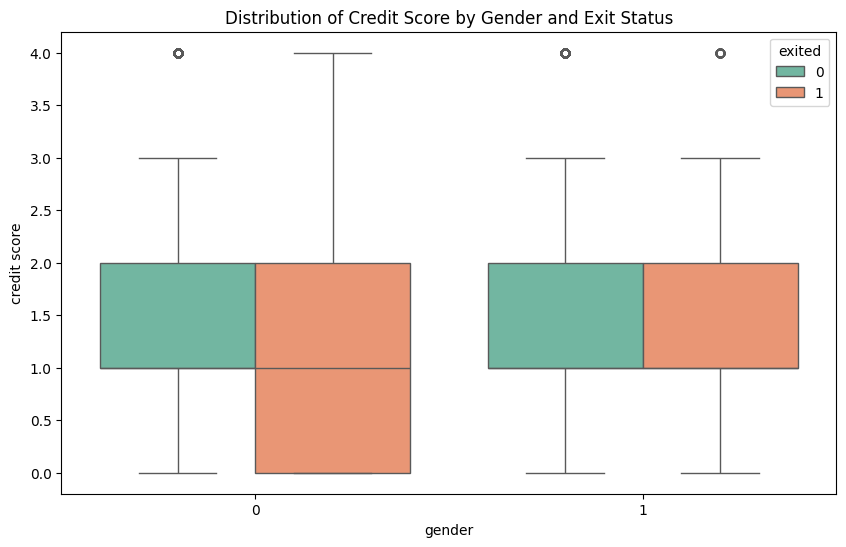

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='gender', y='creditscore', hue='exited', palette='Set2')
plt.title('Distribution of Credit Score by Gender and Exit Status')
plt.xlabel('gender')
plt.ylabel('credit score')
plt.show()

Key Insights:
Credit Score Distribution by Gender and Exit Status:

The box plot shows the distribution of credit scores for both male and female customers, separated by their exit status (churned or not churned).

Gender Comparison:

Both male and female customers who exited the bank tend to have a wide range of credit scores.
There is no significant difference in the distribution of credit scores between male and female customers.

Churn Patterns:

Customers with lower credit scores are more likely to churn, as indicated by the lower median credit scores for churned customers.
However, there are also churned customers with high credit scores, suggesting that credit score alone is not a definitive predictor of churn.

Overall Distribution:

The majority of customers, regardless of gender or exit status, have credit scores clustered around the middle range (600-700).

# C- Milestone 3 : Machine Learning Model Development
- Objectives:
Build, train, and optimize machine learning models to predict churn.

# 1 Model Selection :

- Choose machine learning models suited for classification (Logistic Regression, Random Forest, Gradient Boosting, etc.).
- Ensure that the models are appropriate for predicting binary outcomes (churn vs. no churn).

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns

#2- Model Training :
- Split the data into training and test sets, ensuring balanced classes (e.g., using oversampling or undersampling).
- Train models using cross-validation techniques to assess their generalization capabilities.

## 2.1 Spliting dataset

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(" Shape of xtrain = ",xtrain.shape,"\n","Shape of xtest = ",xtest.shape)

 Shape of xtrain =  (12584, 17) 
 Shape of xtest =  (3146, 17)


In [ ]:
print(" Shape of ytrain = ",ytrain.shape,"\n","Shape of ytest = ",ytest.shape)

 Shape of ytrain =  (12584, 1) 
 Shape of ytest =  (3146, 1)


## 2.2 Training the model

### 2.2.1 Support Vector Machine

In [ ]:
# Train Model
svc_model = SVC(random_state=42)
svc_model.fit(xtrain, ytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

In [ ]:
# Predictions
y_pred_svc = svc_model.predict(xtest)

In [ ]:
# Evaluate the Model
print(classification_report(ytest, y_pred_svc))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1596
           1       0.82      0.78      0.80      1550

    accuracy                           0.81      3146
   macro avg       0.81      0.81      0.81      3146
weighted avg       0.81      0.81      0.81      3146



In [ ]:
confusion_matrix(ytest, y_pred_svc)

array([[1335,  261],
       [ 339, 1211]])

In [ ]:
# accuracy on training
y_pred_train_svc = svc_model.predict(xtrain)

# Calculate the accuracy on the training data
accuracy_train_svc = accuracy_score(ytrain, y_pred_train_svc)

print(f"Accuracy on training data for SVC: {accuracy_train_svc}")


Accuracy on training data for SVC: 0.8208041958041958


In [ ]:
print("Accuracy:", accuracy_score(ytest, y_pred_svc))

Accuracy: 0.8092816274634457


### 2.2.2 Logistic Regression

In [ ]:
# Initialize and train the Logistic Regression model with specific hyperparameters
log_reg_model = LogisticRegression(C=.1, max_iter=10000, random_state=42)
log_reg_model.fit(xtrain, ytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, max_iter=10000, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_log = log_reg_model.predict(xtest)

In [ ]:
# Evaluate the model
print(classification_report(ytest, y_pred_log))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1596
           1       0.75      0.73      0.74      1550

    accuracy                           0.75      3146
   macro avg       0.75      0.74      0.74      3146
weighted avg       0.75      0.75      0.74      3146



In [ ]:
confusion_matrix(ytest, y_pred_log)

array([[1214,  382],
       [ 420, 1130]])

In [ ]:
print("Accuracy:", accuracy_score(ytest, y_pred_log))

Accuracy: 0.7450731087094723


### 2.2.3 RandomForestClassifier

In [ ]:
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=42)
rf_model.fit(xtrain, ytrain)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Predictions
y_pred_rf = rf_model.predict(xtest)

# Evaluate the model
print(classification_report(ytest, y_pred_rf))
print(confusion_matrix(ytest, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1596
           1       0.88      0.90      0.89      1550

    accuracy                           0.89      3146
   macro avg       0.89      0.89      0.89      3146
weighted avg       0.89      0.89      0.89      3146

[[1406  190]
 [ 156 1394]]


In [ ]:
# Accuracy on training data
y_pred_train_rf = rf_model.predict(xtrain)
accuracy_train_rf = accuracy_score(ytrain, y_pred_train_rf)
print(f"Accuracy on training data for Random Forest: {accuracy_train_rf}")

print(f"Accuracy on test data for Random Forest: {accuracy_score(ytest, y_pred_rf)}")

Accuracy on training data for Random Forest: 1.0
Accuracy on test data for Random Forest: 0.8900190718372537


## 2.3 Comparison

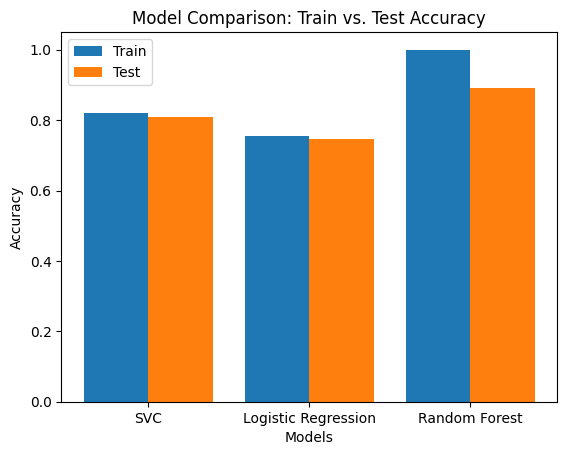

In [ ]:
# Update the visualization data
models = ['SVC', 'Logistic Regression', 'Random Forest']
train_accuracies = [accuracy_train_svc, accuracy_score(ytrain, log_reg_model.predict(xtrain)), accuracy_train_rf]
test_accuracies = [accuracy_score(ytest, y_pred_svc), accuracy_score(ytest, y_pred_log), accuracy_score(ytest, y_pred_rf)]

# Create the bar plot
X_axis = np.arange(len(models))
plt.bar(X_axis - 0.2, train_accuracies, 0.4, label='Train')
plt.bar(X_axis + 0.2, test_accuracies, 0.4, label='Test')

plt.xticks(X_axis, models)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison: Train vs. Test Accuracy")
plt.legend()
plt.show()